In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
./chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
./chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
./chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
./chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
./chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
./chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
./chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
./chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
./chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
./chest_xray/train/NORMAL/NORMAL2-IM-0517-0001.jpeg
./chest_xray/train/NORMAL/IM-0724-0001.jpeg
./chest_xray/train/NORMAL/IM-0395-0001.jpeg
./ch

# <h1 style='background:#6B614B; border:0; color:#B0B7B5'><center>Pneumonia Diagnosis By CXR Images</center></h1> 

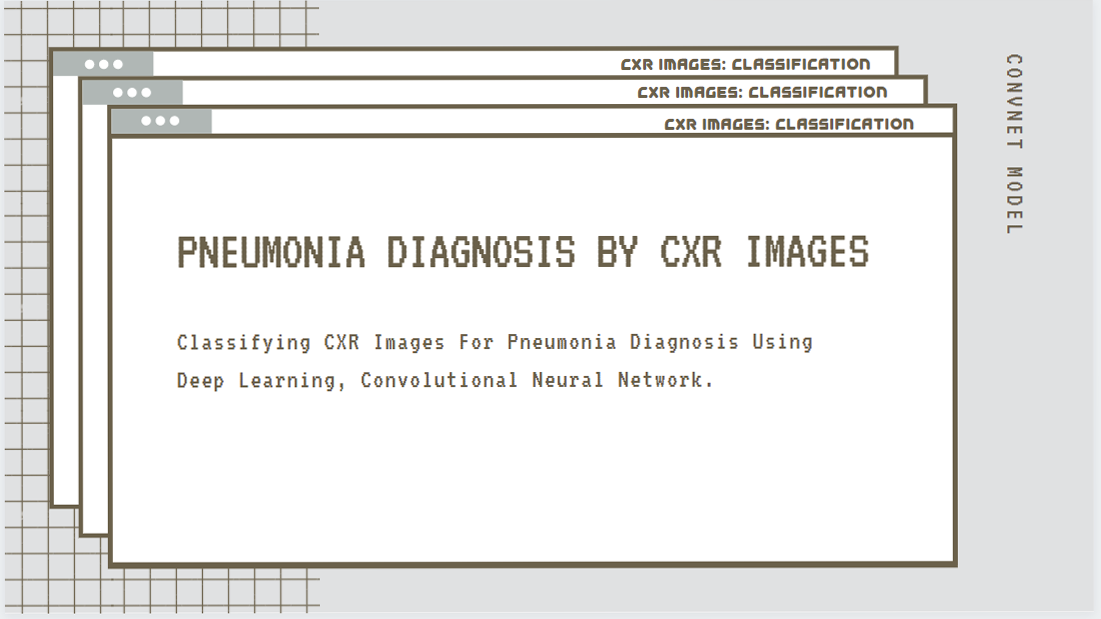

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#6B614B; border:0; color:#B0B7B5'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)    

[3. DATA VISUALIZATION](#3)        

[4. MODEL BUILDING](#4) 

[5. CONCLUSION](#5) 

[6. END](#6) 
    
 <a id="1"></a>
# **<span style="color:#6B614B;">IMPORTING LIBRARIES</span>**

In [2]:
# Importing all the libraries 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
import cv2

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# **<span style="color:#6B614B;">LOADING DATA</span>**

In [3]:
# Define path to the data directory
dir_alldata = Path('./chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_data_dir = dir_alldata / 'train'

# Path to validation directory
validation_data_dir = dir_alldata / 'val'

# Path to test directory
test_data_dir = dir_alldata / 'test'

# Get the path to the normal and pneumonia sub-directories
normal_cases_train = train_data_dir / 'NORMAL'
pneumonia_cases_train = train_data_dir / 'PNEUMONIA'

In [4]:
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 50
batch_size = 20

if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height)
else:
    input_shape =(img_width, img_height,3)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


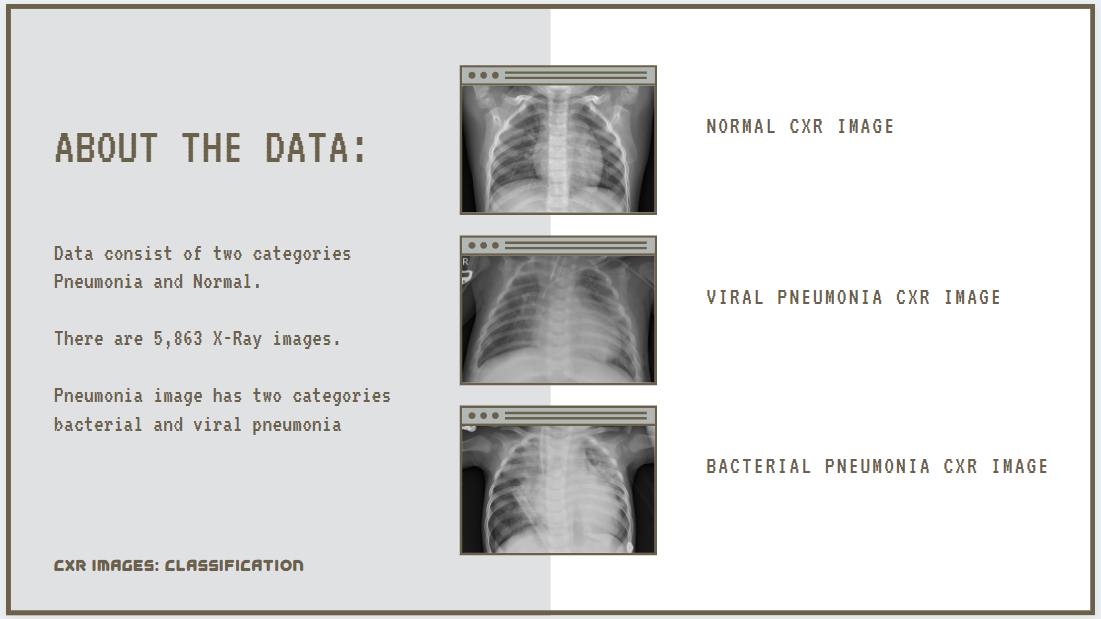

<a id="3"></a>
# **<span style="color:#6B614B;">DATA VISUALIZATION</span>**

**Steps involved in visualisation:**

* Plotting Random Normal Images
* Plotting Random Pneumonia Images
* Plotting Count of Positive and Negative Cases

**<span style="color:#6B614B;">Three Random Normal CXR Images from the dataset</span>**

Printing three Normal random images 
IM-0030-0001.jpeg
NORMAL2-IM-0035-0001.jpeg
NORMAL2-IM-0323-0001.jpeg


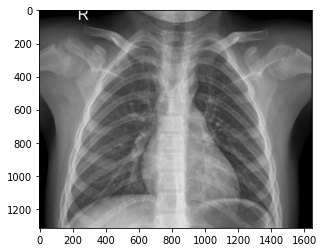

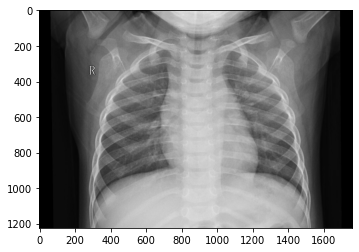

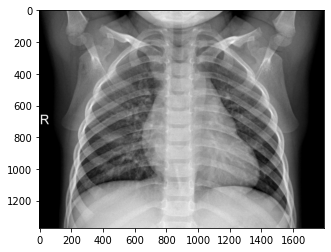

In [5]:
# Three Random Normal CXR Images from the dataset
import os, random

folder_N=r"./chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 


**<span style="color:#6B614B;">Three Random Pneumonia CXR Images from the dataset</span>**

Printing three PNEUMONIA random images 
person44_virus_93.jpeg
person78_virus_140.jpeg
person78_bacteria_382.jpeg


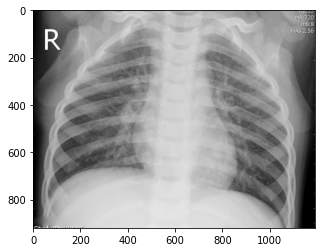

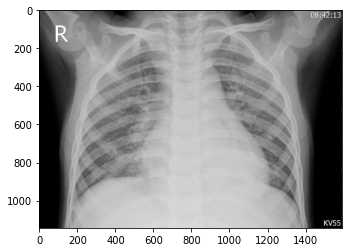

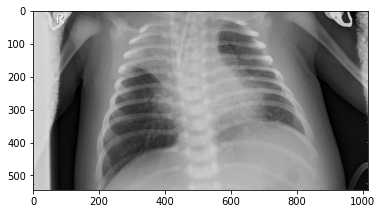

In [6]:
# Three Random Pneumonia CXR Images from the dataset
import os, random

folder_P=r"./chest_xray/test/PNEUMONIA"

d=random.choice(os.listdir(folder_P))
e=random.choice(os.listdir(folder_P))
f=random.choice(os.listdir(folder_P))
print("Printing three PNEUMONIA random images ")
print(d)
print(e)
print(f)

random_P = [d, e, f]

for i in random_P:
    file = folder_P+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 



The dataset is labelled by a medical professional. It is not decipherable for a layman. However, it seems like the sharpness around the diaphragm could be the deciding factor. Nonetheless, there have been exceptions in that case as well. So this diagnosis is a subjective matter.  Let's leave it to the Convnet to figure that out. 

**Next, we will have a look at the count of classes.**

**<span style="color:#6B614B;">The count of classes</span>**

Text(0.5, 1.0, 'Count of Positive (0) and Negative Cases (1)')

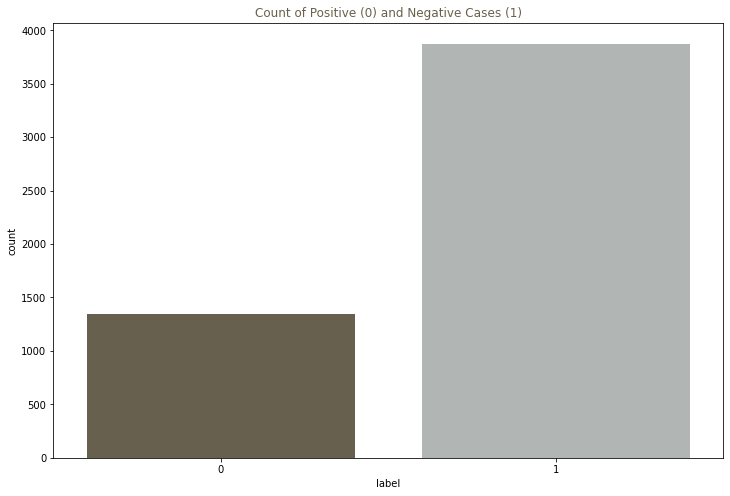

In [7]:
# To plot the count plot I am changing the dataset into a pandas dataframe
# Get the list of all the images
normal = normal_cases_train.glob('*.jpeg')
pneumonia = pneumonia_cases_train.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_df = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal:
    train_df.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia:
    train_df.append((img,1))

# Get a pandas dataframe from the data we have in our list 
train_df = pd.DataFrame(train_df, columns=['image', 'label'],index=None)

# Shuffle the data 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
plt.figure(figsize=(12,8))
count = sns.countplot(train_df["label"], palette=["#6B614B","#B0B7B5"])
count.set_title("Count of Positive (0) and Negative Cases (1)", color="#6B614B")


There is a data imbalance. The number of Pneumonia CXR images are more than the number of normal CXR images.  

<a id="4"></a>
# **<span style="color:#6B614B;">MODEL BUILDING</span>**


**In this project, we build an Convolutional neural network.**

Following steps are involved in the model building

* Initialising the Convnet
* Defining by adding layers
* Compiling the Convnet
* Train the Convnet

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

2021-08-30 19:18:00.342463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 19:18:00.349414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 19:18:00.349815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-30 19:18:00.350583: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample//batch_size, epochs=epochs,validation_data=validation_generator, validation_steps=nb_validation_samples//batch_size)

2021-08-30 19:18:01.507104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-08-30 19:18:02.870904: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


50/50 [==============================] - 15s 248ms/step - loss: 0.6063 - accuracy: 0.7380 - val_loss: 0.8168 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 12s 248ms/step - loss: 0.5253 - accuracy: 0.7390
Epoch 3/50
50/50 [==============================] - 12s 247ms/step - loss: 0.3837 - accuracy: 0.8110
Epoch 4/50
50/50 [==============================] - 12s 240ms/step - loss: 0.3605 - accuracy: 0.8060
Epoch 5/50
50/50 [==============================] - 12s 241ms/step - loss: 0.3430 - accuracy: 0.8400
Epoch 6/50
50/50 [==============================] - 12s 246ms/step - loss: 0.3318 - accuracy: 0.8540
Epoch 7/50
50/50 [==============================] - 11s 226ms/step - loss: 0.2892 - accuracy: 0.8815
Epoch 8/50
50/50 [==============================] - 12s 238ms/step - loss: 0.3212 - accuracy: 0.8614
Epoch 9/50
50/50 [==============================] - 13s 264ms/step - loss: 0.2887 - accuracy: 0.8845
Epoch 10/50
50/50 [==============================] - 13s 258

<a id="5"></a>
# **<span style="color:#6B614B;">CONCLUSION</span>** 


**Concluding the model with:**

* Testing on the test set
* Evaluating Test Accuracy

In [11]:
test_accuracy = model.evaluate_generator(test_generator)

In [12]:
print('The accuracy on test set :',test_accuracy[1]*100 )

The accuracy on test set : 81.25


In [13]:
model.save('../ml_model.h5')

In [14]:
print(test_accuracy)

[0.6954960823059082, 0.8125]


In [68]:
prediction = model.predict(test_generator, steps=1)

In [69]:
print(prediction)

[[0.99999917]
 [0.9999814 ]
 [0.99829286]
 [0.449833  ]
 [0.9999999 ]
 [0.99998295]
 [0.9999994 ]
 [0.99999964]
 [1.        ]
 [0.99998164]
 [0.02768697]
 [0.9999999 ]
 [0.5781335 ]
 [0.16802885]
 [0.9964845 ]
 [0.99999666]
 [0.9898234 ]
 [0.7491031 ]
 [0.83742994]
 [0.02396415]]


In [110]:

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

my_image = load_img("./chest_xray/essai/IM-0164-0001.jpeg", target_size=(150,150))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)
print(prediction)

[[0.]]


In [111]:

image = tf.keras.preprocessing.image.load_img("./chest_xray/essai/IM-0164-0001.jpeg", target_size=(150,150))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)

[[1.]]
